In [25]:
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import numpy as np
import mplhep as hep
import matplotlib as mpl
from matplotlib.colors import LogNorm

from heplot import string_constants as hestco
from heplot import preprocessing as prep

import sys
sys.path.append('..')
import src.util.string_constants as stco
import src.input_generator as inge
import src.util.runtime_util as rtut
import src.util.math_util as maut

# plotting

In [32]:
def plot_2feature_2D_hist(x, y, x_label='x', y_label='y', title=None, plot_name='2dhist', fig_dir=None, axlim=False):

    # Load CMS style sheet
    #plt.style.use(hep.style.CMS)

    # setup colormap for 2dhist
    cmap = mpl.colormaps['Blues']
    xc = np.linspace(0.0, 1.0, 150)
    color_list = cmap(xc)
    color_list = np.vstack((color_list[0], color_list[35:])) # keep white, drop light colors 
    my_cm = colors.ListedColormap(color_list)

    fig = plt.figure(figsize=(5, 5))
    x_min, x_max = np.min(x), np.max(x)
    y_min, y_max = np.min(y), np.max(y)
    x_top = np.percentile(x, 99.999) if axlim else x_max
    y_top = np.percentile(y, 99.999) if axlim else y_max
    ax_range = ((x_min * 0.9,x_top), (y_min * 0.9,y_top))
    plt.hist2d(x, y, range=ax_range, norm=(LogNorm()), bins=200, cmap=my_cm, cmin=0.001)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    #plt.title('quantile cuts' + title_suffix)
    plt.colorbar()
    leg = plt.legend(loc='best', title=title, fontsize=14, title_fontsize=17,frameon=False)
    plt.draw()
    if fig_dir:
        fig.savefig(os.path.join(fig_dir, plot_name+'.png'), bbox_inches='tight')
    plt.show()
    plt.close(fig)

# true E vs sum sensor E

In [6]:
file_path = os.path.join(stco.input_dir,'Feb24.pkl') 

# read dataframe with all layer energy running sums once
df = inge.read_multilayer_calo_file_summed_E(file_path)
print(f'{len(df)} samples read')

50000 samples read


In [7]:
df

,true_energy,total_dep_energy,sensor_energy,sum_1L,sum_2L,sum_3L,sum_4L,sum_5L,sum_6L,sum_7L,...,sum_21L,sum_22L,sum_23L,sum_24L,sum_25L,sum_26L,sum_27L,sum_28L,sum_29L,sum_30L
0,80.469957,1487.995937,[0.0 0.0005520819346429562 2.0036610635543184e...,0.000000e+00,0.000552,0.000572,0.001207,0.622404,1.119444,1.311666,...,1355.184888,1393.671381,1422.404828,1450.744253,1453.120332,1461.549292,1466.213857,1487.876493,1487.879790,1487.995937
1,9.460158,198.218322,[8.094880828416008 7.904170302463657 33.999516...,8.094881e+00,15.999051,49.998568,74.073377,81.501450,97.361380,105.764707,...,198.218322,198.218322,198.218322,198.218322,198.218322,198.218322,198.218322,198.218322,198.218322,198.218322
2,56.789749,1257.078121,[5.504441240124663 13.737559741973328 12.18106...,5.504441e+00,19.242001,31.423071,119.936197,184.652422,246.717998,298.342759,...,1248.647674,1254.534237,1254.534997,1256.322023,1257.078121,1257.078121,1257.078121,1257.078121,1257.078121,1257.078121
3,71.867515,1475.696790,[3.870281601855405 3.8942470302956096 4.667922...,3.870282e+00,7.764529,12.432451,20.416626,28.415644,37.774386,52.039959,...,1458.139436,1461.702987,1475.696790,1475.696790,1475.696790,1475.696790,1475.696790,1475.696790,1475.696790,1475.696790
4,37.393436,542.769085,[0.029139849388684524 0.2059746475273414 0.781...,2.913985e-02,0.235114,1.016288,1.023488,1.673577,1.920270,2.305185,...,514.851652,517.592126,520.159130,524.076977,527.248031,535.162207,542.329485,542.769085,542.769085,542.769085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,22.918417,368.753786,[1.0370277913771133 0.5761219132991755 1.25273...,1.037028e+00,1.613150,2.865887,4.187415,7.097562,11.739640,28.524861,...,359.781760,359.781760,363.950954,368.753786,368.753786,368.753786,368.753786,368.753786,368.753786,368.753786
49996,63.224774,1385.120621,[0.0 0.0 0.0 0.0 7.527858417688549e-05 8.33845...,0.000000e+00,0.000000,0.000000,0.000000,0.000075,0.000159,0.002026,...,1371.717153,1376.976313,1380.902245,1385.097192,1385.120541,1385.120621,1385.120621,1385.120621,1385.120621,1385.120621
49997,2.393025,74.366224,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,73.986532,74.073528,74.365339,74.366224,74.366224,74.366224,74.366224,74.366224,74.366224,74.366224
49998,4.395077,108.999683,[6.228565325727686e-07 0.00036497270139079774 ...,6.228565e-07,0.000366,0.003068,0.134446,0.134464,0.329863,1.495242,...,108.999683,108.999683,108.999683,108.999683,108.999683,108.999683,108.999683,108.999683,108.999683,108.999683


In [16]:
A_train, B_train, _, _ = inge.read_inputs_from_df(df, b_label='sum_2L')
A_train, B_train = A_train.cpu().numpy().squeeze(), B_train.cpu().numpy().squeeze()

In [17]:
A_train

array([80.469955 ,  9.460158 , 56.78975  , ...,  2.3930252,  4.3950777,
       99.33427  ], dtype=float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


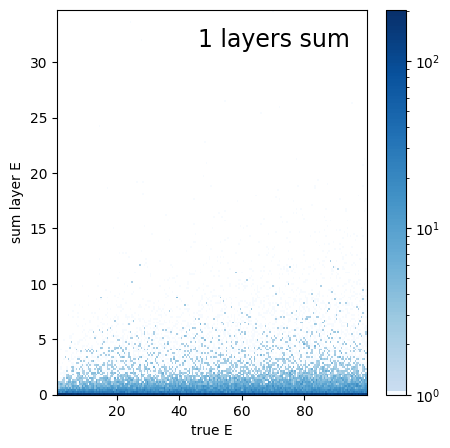

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


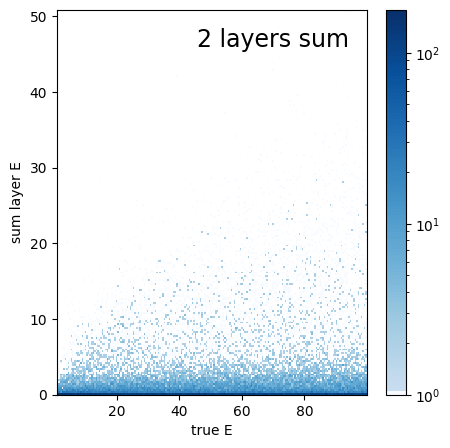

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


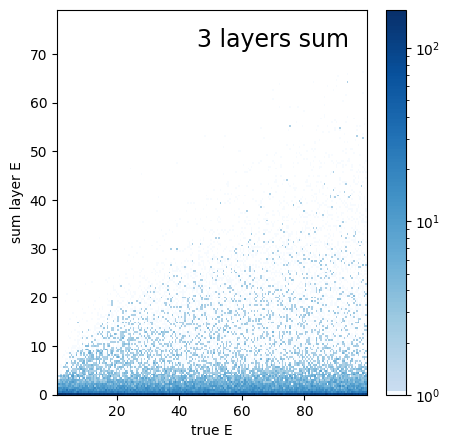

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


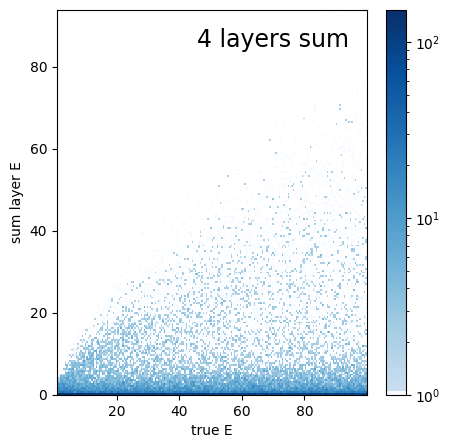

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


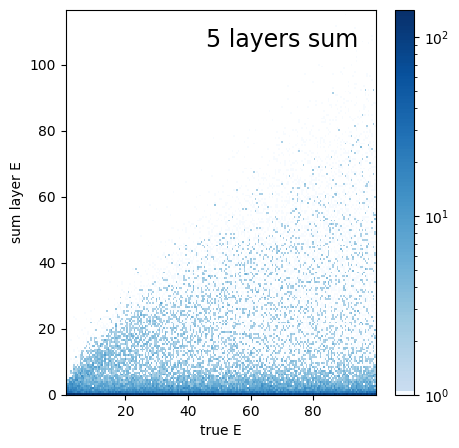

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


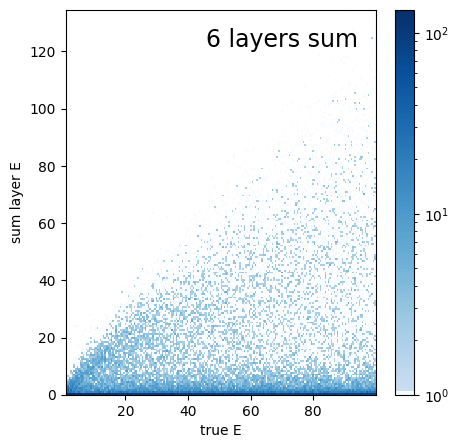

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


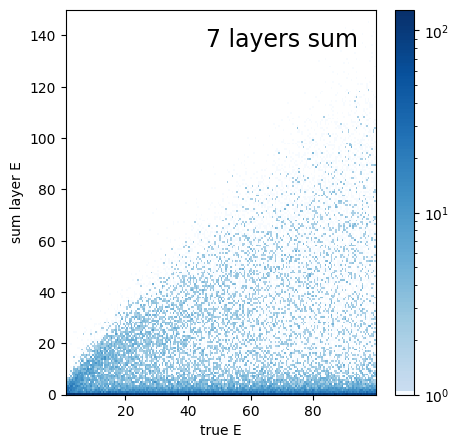

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


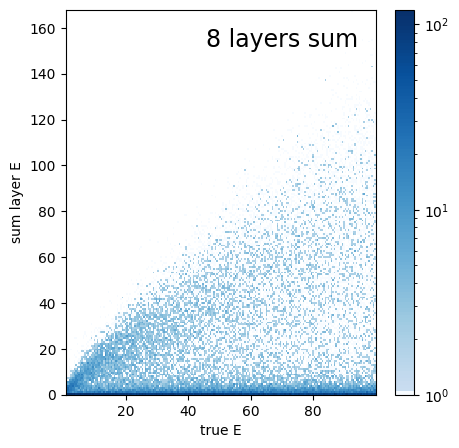

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


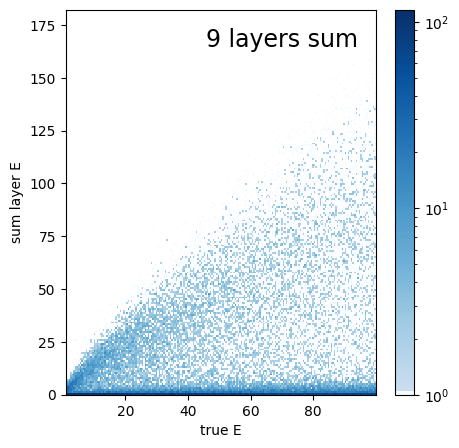

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


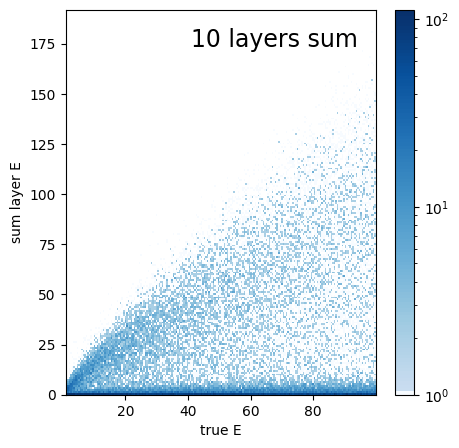

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


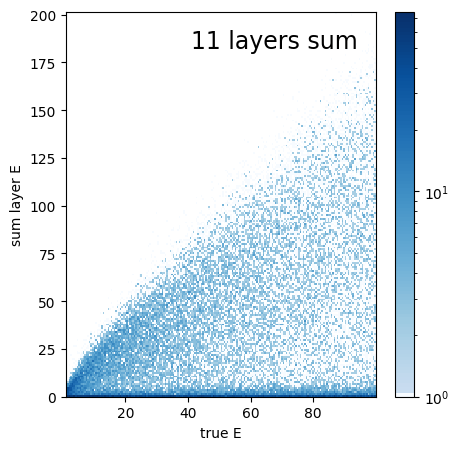

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


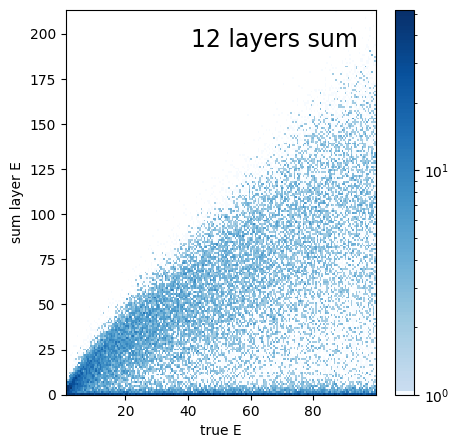

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


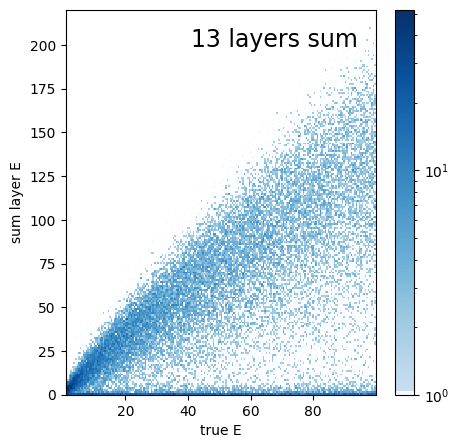

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


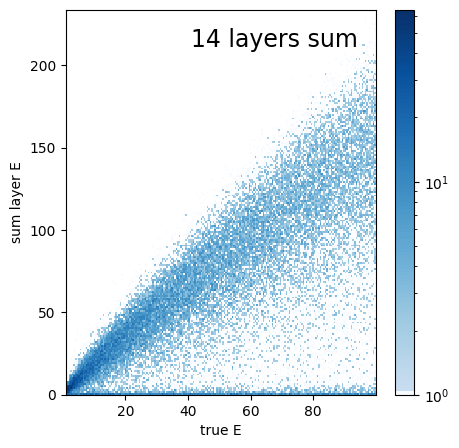

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


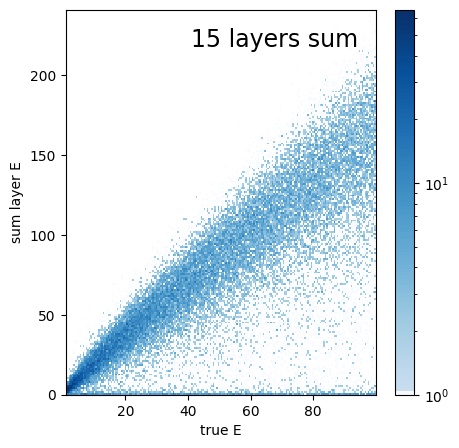

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


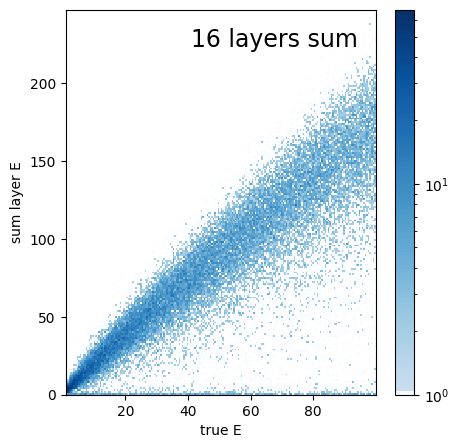

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


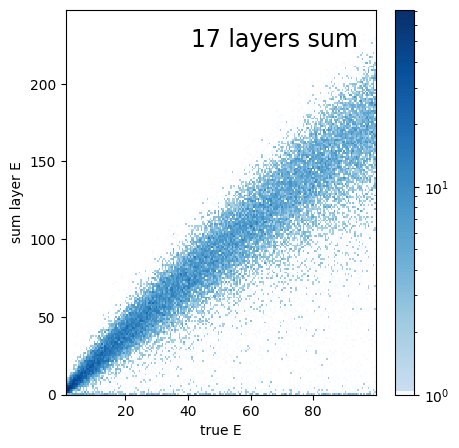

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


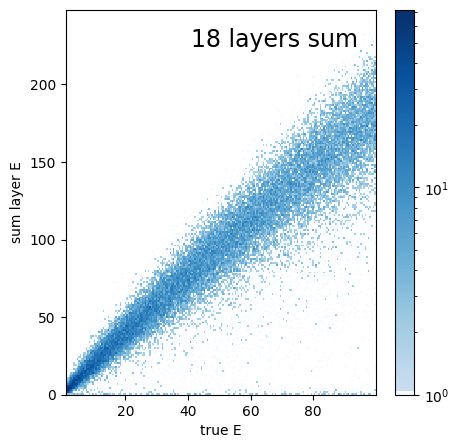

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


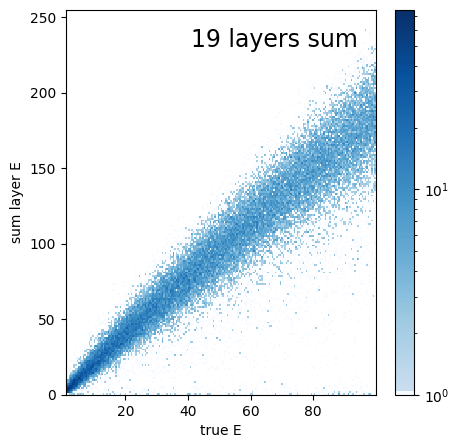

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


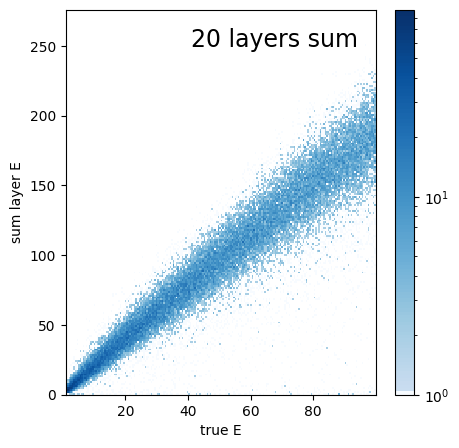

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


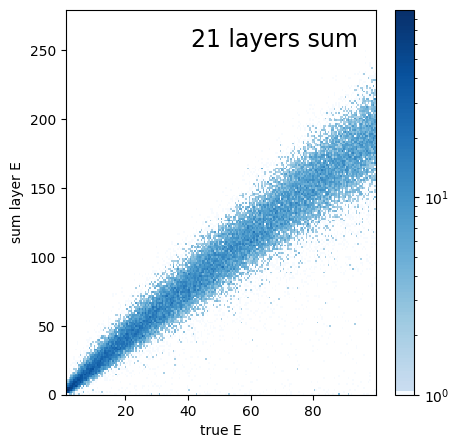

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


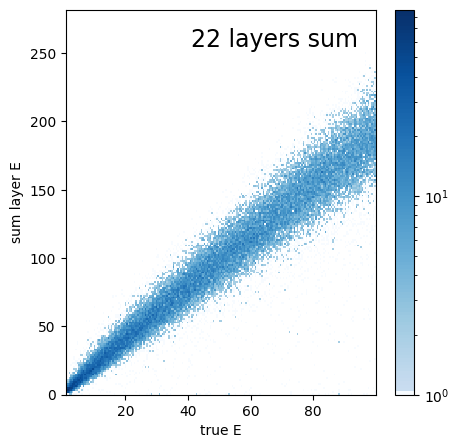

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


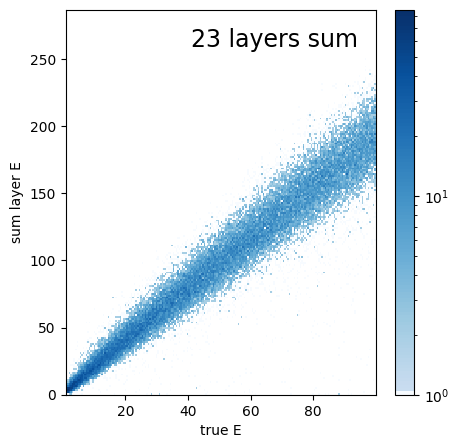

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


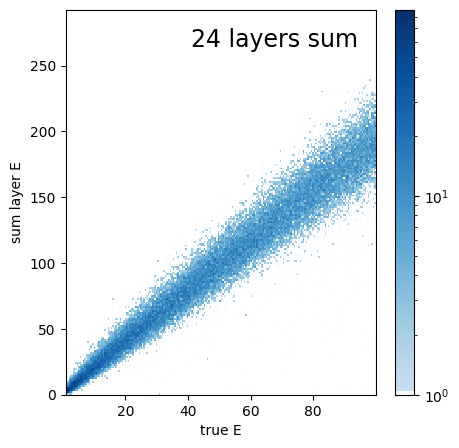

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


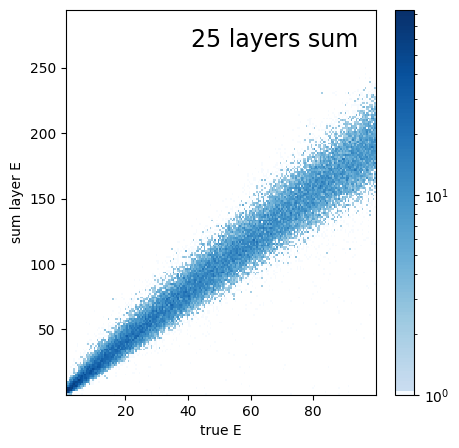

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


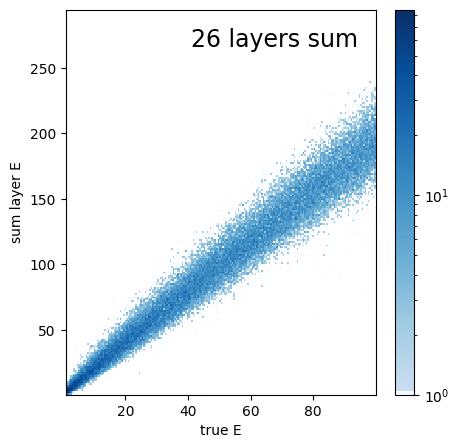

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


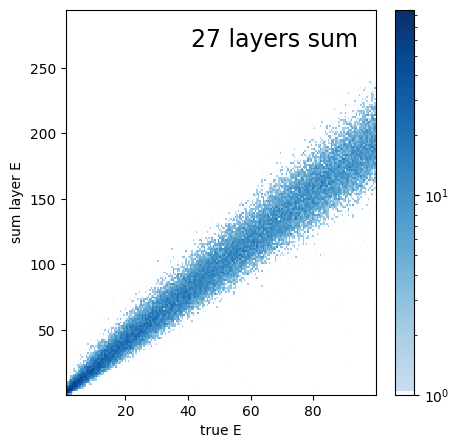

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


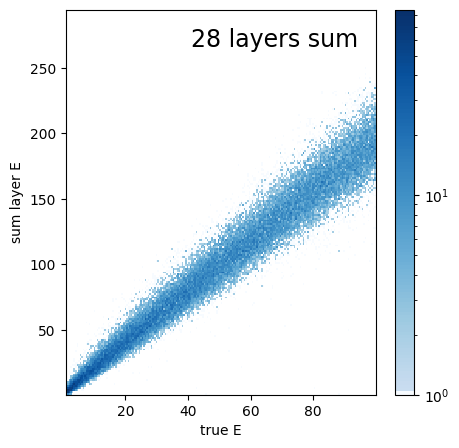

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


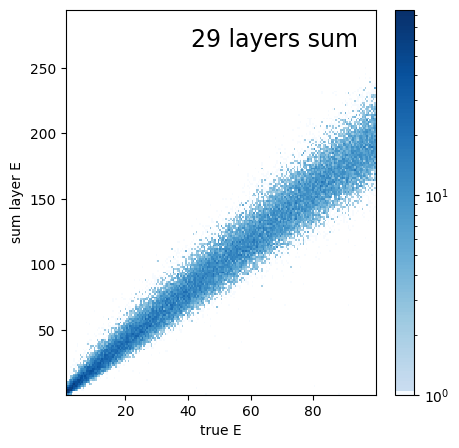

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


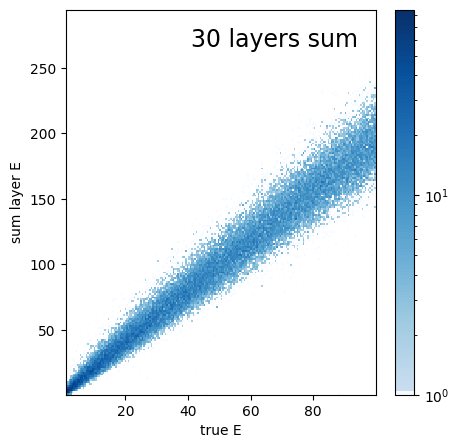

In [35]:
N_layers = 30
configs_layer_sum = {f'{i} layers sum':f'sum_{i}L' for i in range(1,N_layers+1)}
for title,b_label in configs_layer_sum.items():

    A_train, B_train, _, _ = inge.read_inputs_from_df(df, b_label=b_label)
    A_train, B_train = A_train.cpu().numpy().squeeze(), B_train.cpu().numpy().squeeze()
    plot_2feature_2D_hist(A_train,B_train/10.,x_label='true E', y_label='sum layer E', title=title)

In [ ]:
plot_2feature_2D_hist(A_train,B_train,x_label='true E', y_label='sum layer E')